In [1]:
### PREAMBLE
# Maximum likelihood estimation, naive Bayes
# mle.svg

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Maximum Likelihood Estimator

Whereas the last set of notes was about the basic rules of probability, this set of notes will be about some basic techniques in statistics.  For the purposes of this course, statistics essentially means "probability plus data".  That The lecture and notes on probability focused on the basic task of modeling random variables and their distributions.  These notes ask a different question: if we are given some collection _data_, how can we find a distribution (or more specifically, find the parameters of a particular class of distribution), that fit this data "well".

A bit more specifically, our setting here is that we have access to some data set, written as
\begin{equation}
x^{(1)}, \ldots, x^{(m)}.
\end{equation}
Our main question is: can I come up with some random variable and distribution $p(X)$ such that the data is well-modeled by this distribution (informally speaking, does the data look like it might be a random sample from this distribution).  In general, this is a hard problem.  If we consider the class of all possible possible possible distributions, there is no real way to efficiently characterize the "best" fit to the data.

Instead, the common strategy is to pick our distribution from a certain _parameterized family_ of distribution $p(X;\theta)$, parameterized by $\theta$, and have our goal be to find the parameters $\theta$ that fir the data best.  Even here there are multiple different approaches that are possible, but at the very least this gives us a more concrete problem that lets us better attack the underlying problem.

In this set of notes, we'll first answer this estimation problem by appeal to the maximum likelihood estimation (MLE) procedure. Then we'll discuss a few additional topics, including the naive Bayes algorithm and how it relates to MLE.  We'll conclude by discussing the strong connections between loss functions in machine learning and MLE methods in statistics.

## Maximum likelihood estimation

Given some parameterized distribution $p(X;\theta)$, and an collection of (independent) samples $x^{(1)},\ldots,x^{(m)}$, we can compute the probability of observing this set of samples under the distribution, which is simply given by
\begin{equation}
p(x^{(1)},\ldots,x^{(m)};\theta) = \prod_{i=1}^m p(x^{(i)};\theta)
\end{equation}
where here we just use the fact that the samples are all assumed to be independent, and we can thus write their joint probability as the product of their probabilities (remember from our last set of notes that this was simply our definition of independence).

The basic idea of maximum likelihood estimation, is that _we want to pick parameters $\theta$ that maximize the probaiblity of the observed data_; in other words, we want to choose $\theta$ to solve the optimization problem
\begin{equation}
\DeclareMathOperator*{maximize}{maximize}
\maximize_\theta \; \prod_{i=1}^m p(x^{(i)};\theta)
\end{equation}
or equivalently (because maximizing a function is equivalent to maximizing the log of that function, and we can scale this function arbitrarily).
\begin{equation}
\maximize_\theta \; \frac{1}{m} \sum_{i=1}^m \log p(x^{(i)};\theta)
\end{equation}

The term we are maximizing above is so common that it usually has it's own name: the _log-likelihood of the data_, written as
\begin{equation}
\ell(\theta) = \frac{1}{m} \sum_{i=1}^m \log p(x^{(i)};\theta)
\end{equation}
where we explicitly write $\ell$ as a function of $\theta$ because we want to emphasize the fact this likelihood depends on the parameters.

This procedure may seem "obvious" when stated like this (of course we want to find the parameters that make the data as likely as possible), but there are actually a number of other estimators that are equally valid or reasonable in many situations.  We'll consider some of these when we discuss hypothesis testing and then later probabilistic modeling, but for now, maximum likelihood estimation will serve as a nice principle for how we fit parameters of distributions to data.

### Example: Bernoulli distribution

Let's take a simple example as an illustration of this point for the Bernoulli distribution.  Recall that a Bernoulli distribution, $p(X;\phi)$ is a simple binary distribution over random variables taking values in $\{0,1\}$, parameterized by $\phi$, which is just the probability of the random variable being equal to one. Now suppose we have some data $x^{(1)}, \ldots, x^{(m)}$ with $x^{(i)} \in \{0,1\})$; what would be a good estimate of the Bernoulli parameter $\phi$?  For example, maybe we flipped a coin 100 times and 30 of these times it came up heads; what would be a good estimate for the probability that this coin comes up heads?

The "obvious" answer here is that we just estimate $\phi$ to be the proportion of 1's in the data
\begin{equation}
\phi = \frac{\mbox{# 1's}}{\mbox{# Total}} = \frac{\sum_{i=1}^m x^{(i)}}{m}.
\end{equation}
But why is this the case?  If we flip the coin just once, for example, would we expect that we should estimate $\phi$ to be either zero or one?  Maybe some other estimators exist that can better handle our expectation that the coin "should" be unbiased, i.e., have $\phi = 1/2$.

While this is certainly true, in fact that maximum likelihood estimate of $\phi$ _is_ just the equation above, the number of ones divided by the total number.  So this gives some rationale that at least under the principles of maximum likelihood esimation, we should believe that this is a good estimate.  However, showing that this is in fact the maximum likelihood estimator is a little more involved that you might expect.  Let's go through the derivation to see how this work.

First, recall that our objective is to choose $\phi$ maximize the likelihood, or equivalently the log likelihood of the data, of the observed data $x^{(1)}, \ldots, x^{(m)}$.  This can be written as the optimization problem
\begin{equation}
\maximize_{\phi} \sum_{i=1}^m \log p(x^{(i)};\phi).
\end{equation}
Recall that the probability under a Bernoulli distribution is just $p(X=1;\phi) = \phi$, and $p(X=0;\phi) 1 - \phi$, which we can write compactly as
\begin{equation}
p(X = x; \phi) = \phi^x (1-\phi)^{(1-x)}
\end{equation}
(it's easy to see that this equals $\phi$ or $x=1$ and $1-\phi$ for $x=0$).  Plugging this in to our maximum likelihood optimization problem we have
\begin{equation}
\maximize_{\phi} \sum_{i=1}^m \left (x^{(i)}\log\phi + (1-x^{(i)}) \log (1-\phi) \right )
\end{equation}

In order to maximize this equation, let's take the derivative and set it equal to 0 (though we won't show it, it turns out this function just a single maximum point, which thus must have derivative zero, and so we can find it in this manner).  Via some basic calculus we have
\begin{equation}
\begin{split}
\frac{d}{d \phi} \sum_{i=1}^m \left (x^{(i)}\log\phi + (1-x^{(i)}) \log (1-\phi) \right ) 
& = \sum_{i=1}^m \frac{d}{d \phi} \left ( x^{(i)}\log\phi + (1-x^{(i)}) \log (1-\phi) \right )  \\
& = \sum_{i=1}^m \left ( \frac{x^{(i)}}{\phi} - \frac{1-x^{(i)}}{1-\phi} \right )
\end{split}
\end{equation}
Setting this term equal to zero we have
\begin{equation}
\begin{split}
& \sum_{i=1}^m \left ( \frac{x^{(i)}}{\phi} - \frac{1-x^{(i)}}{1-\phi} \right ) = 0 \\
\Longrightarrow \;\; & \frac{\sum_{i=1}^m x^{(i)}}{\phi} - \frac{\sum_{i=1}^m (1-x^{(i)})} {1-\phi} = 0 \\
\Longrightarrow \;\; & (1-\phi) \sum_{i=1}^m x^{(i)}  - \phi \sum_{i=1}^m (1-x^{(i)}) = 0 \\
\Longrightarrow \;\; & \sum_{i=1}^m x^{(i)} = \phi \sum_{i=1}^m (x^{(i)} + (1-x^{(i)})) \\
\Longrightarrow \;\; & \sum_{i=1}^m x^{(i)} = \phi m \\
\Longrightarrow \;\; & \phi = \frac{\sum_{i=1}^m x^{(i)}}{m}.
\end{split}
\end{equation}

And there we have it, the surprisingly long proof of the fact that if we want to pick $\phi$ to maximize the likelihood of the observed data, we need to choose it to be equal to the empirical proportion of the ones.  Of course, the objections we had at the beginning of this section were also valid: and in fact this perhaps is _not_ the best estimate of $\phi$ if we have very little data, or some prior information about what values $\phi$ should take.  But it _is_ the estimate of $\phi$ that maximizes the probability of the observed data, and if this is a bad estimate then it reflects more on the underlying problem with this procedure than with the proof above.  Nonetheless, in the presence of a lot of data, there is actually good reason to use the maximum likelihood estimator, and it is extremely common to use in practice.

### Example: normal distribution

Let's take another example, a one dimensional normal distribution with mean $\mu$ and variance $\sigma^2$ (note that we're going to directly estimate $\sigma^2$, not $\sigma$ here).  Going through the procedure a bit more quickly this time, noting that the Gaussian density is given by
\begin{equation}
p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2 \sigma^2} \right )
\end{equation}
then given some data $x^{(1)}, \ldots, x^{(m)}$ with $x^{(i)} \in \mathbb{R}^n$, the maximum likelihood estimation problem takes the form
\begin{equation}
\maximize_{\mu, \sigma^2} \sum_{i=1}^m \log p(x^{(i)}; \mu, \sigma^2) \;\; \equiv \;\; \maximize_{\mu, \sigma^2} \sum_{i=1}^m \frac{1}{2} \left(-\log(2 \pi) - \log \sigma^2 -\frac{(x-\mu)^2}{\sigma^2} \right ).
\end{equation}
where the optimization objective can also be abbreviated as the log likelihood $\ell(\mu,\sigma^2)$.

Let's first take the derivative with respect to $\mu$ and set it equation to zero
\begin{equation}
\frac{\partial \ell(\mu,\sigma^2)}{\partial \mu} = \sum_{i=1}^m \frac{x^{(i)} - \mu}{\sigma^2}
\end{equation}
and setting the equation to zero gives
\begin{equation}
\sum_{i=1}^m \frac{x^{(i)} - \mu}{\sigma^2} = 0 \; \Longrightarrow \; \sum_{i=1}^m x^{(i)} = m \mu \; \Longrightarrow \mu = \frac{1}{m} \sum_{i=1}^m x^{(i)}
\end{equation}
So we have the fact that the maximum likelihood estimate of the mean $\mu$ is just equal to the empirical mean of the data.  This may not seem all that surprising, but if you didn't know that the parameter $\mu$ was in fact the mean of the distribution, this would probably be much less apparent initially.  But this derivation illustrates that in order to maximize the probability of the data, we pick the mean to be equal to the empirical mean.

The derivation for $\sigma$ is similar.  Specifically, the derivative there is given by
\begin{equation}
\frac{\partial \ell(\mu,\sigma^2)}{\partial \sigma^2} = \sum_{i=1}^m \frac{1}{2} \left ( -\frac{1}{\sigma^2} + \frac{(x^{(i)} - \mu)^2}{(\sigma^2)^2} \right )
\end{equation}

and setting equal to zero gives
\begin{equation}
\begin{split}
& \sum_{i=1}^m \frac{1}{2} \left ( -\frac{1}{\sigma^2} + \frac{(x^{(i)} - \mu)^2}{(\sigma^2)^2} \right ) = 0 \\
\Longrightarrow \;\; & -\sum_{i=1}^m \sigma^2 + \sum_{i=1}^m (x^{(i)} - \mu)^2 = 0 \\
\Longrightarrow \;\; & \sigma^2 = \frac{1}{m} \sum_{i=1}^m (x^{(i)} - \mu)^2
\end{split}
\end{equation}
i.e., the best estimate for the variance parameter of a Gaussian is simply the empirical estimate of the variance.


## Naive Bayes
One simple algorithm that results from the integration of maximum likelihood estimation techniques is the naive Bayes algorithm for classification.  It is actually also possible to present naive Bayes in terms of the standard "three elements" of a machine learning algorithm, but we won't adopt that approach right here, and will instead focus on its instantiation as a statistical modeling algorithm that results from a few probabilistic assumptions.

### Modeling the joint distribution $p(X,Y)$
The basic idea of naive Bayes is that we are going to jointly model both the input $x$ and output $y$ of a machine learning prediction problem.  Specifically we assume that the input $X = (X_1,X_2,X_3,\ldots,X_n)$ are binary, categorical, or Gaussian random variables, and that the output $Y$ is a binary or categorical variable (i.e., we are in the setting of binary or multiclass classification).  And our goal is to model the joint distribution $p(X,Y)$.

We are going to do this by first representing the joint distribution as 
\begin{equation}
p(X,Y) = p(X \mid Y)p(Y).
\end{equation}
Of course, in general $X$ is a high dimensional random variable (consider, for instance, the case that $X$ just consists of $n$ binary variables; to represent this entire distribution we would need to assign a probability to each possible assignment of $X$, which would require $2^n -1$ parameters.  The naive Bayes approach, however, is to make the additional assumption that the individual features $X_i$ are _conditionally independent given $Y$_.  This lets us represent the condition distribution $p(X \mid Y)$ as
\begin{equation}
p(X \mid Y) = \prod_{i=1}^n p(X_i \mid Y).
\end{equation}
Because $Y$ is categorical, we can represent $p(X_i \mid Y=y)$ as a separate distribution for each value of $y$.  Thus, we only need to represent $n*k$ different distributions to completely represent our joint distribution, where $k$ is the number of values that $Y$ takes on..

Let's look at this in a bit more detail for the simple case that each $X_i$ and $Y$ are all binary.  In this case, we can represent the entire joint distribution by modeling the different Bernoulli distributions
\begin{equation}
p(Y ; \phi_0), \;\; p(X_i  \mid  Y=0; \phi_i^0) , \;\; p(X_i  \mid  Y=1; \phi_i^1).
\end{equation}
Furthermore, given a collection of examples $(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)})$, we can form the maximum likelihood estimates of these parameters simply by 
\begin{equation}
\phi_0 = \frac{\sum_{j=1}^m y^{(j)}}{m}, \;\; \phi_i^y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}
\end{equation}
where $\mathrm{1}\{\cdot\}$ denotes the 0-1 indicator, the function that is one if the inner argument is true and zero otherwise.  Although this notation is a bit involved, the basic idea is really quite straightforward: in order to estimate the probability $p(X_i=1 \mid Y=1)$ (this is precisely the parameter $\phi_i^1$), we just sum over all the times that $X_i=1$ and $Y=1$, and divide by the number of times that $Y=1$.  Although we don't prove it, you should be able to easily convince yourself that this result follows exactly from the same principle of maximum likelihood that we saw above.

### Making predictions
Now that we have modeled the joint probability in the manner described above, how do we use this to make a prediction given some new input $x$.  The difficulty here is that we have only modeled the conditional distribution $p(X \mid Y)$, not $p(Y \mid X)$; fortunately, this is precisely that Bayes' rule allows us to compute
\begin{equation}
p(Y \mid X) = \frac{p(X \mid Y)p(Y)}{\sum_y p(X \mid y) p(y)}.
\end{equation}
Making this a bit more concrete in terms of the parameters above, for some specific input x $x$
\begin{equation}
p(Y = y \mid X = x) =  \frac{(\phi^0)^y(1-\phi_0)^{(1-y)} \prod_{i=1}^n (\phi_i^y)^{x_i} (1-\phi_i^y)^{(1-x_i)} }{
\sum_{y'}(\phi^0)^{y'}(1-\phi_0)^{(1-y')} \prod_{i=1}^n (\phi_i^{y'})^{x_i} (1-\phi_i^{y'})^{(1-x_i)}}.
\end{equation}
If we are just trying to find the most likely class prediction, we don't necessarily even need to compute the precise probabilities here, we can just compute the numerator terms for each class and then predict the class with the maximum probability (though note that the denominator is just the sum of of the numerator terms over all classes, so it's not any harder to compute the actual probabilities).

### Common issues and solutions

When implementing naive Bayes there are a few common issues that come up which are important to know how to address.  We don't directly show these in code (as implementing naive Bayes is one of the homework problems for this course), the basic ideas are straightforward.

**Log probabilities** The challenge here is that the when we are computing probabilities, the product
\begin{equation}
p(y)\prod_{i=1}^n p(x_i \mid y)
\end{equation}
can be very small, and will quickly go to zero to the numerical precision of floating point numbers.  To resolve this issue, a simple solution is to instead compute the probability in their log space
\begin{equation}
\log p(y) + \sum_{i=1}^n \log p(x_i \mid y).
\end{equation}
If you only want to compute the most likely class, you can just compute these log terms for all possible classes and them predict the most likely one.

**Laplace smoothing**  The second problem is that, if we have never seen some $X_i = 0$ or $X_i = 1$ (for a particular assignment to $Y$, the corresponding probabilities will be zero (and if you take logs, the result would be negative infinity).  To overcome this, we can employ Laplace smoothing, as we saw in the previous lecture on n-gram modeling.  For example, we could replace the probability estimates with
\begin{equation}
\phi_i^y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\} + 1}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\} + 2}
\end{equation}
which is equivalent to "hallucinating" one 0 and one 1 for each of the variables $X_i$.

### Other distributions

Although naive Bayes is often presented as "just counting", the previous discussion on maximum likelihood estimation connection hopefully makes it clear that we can actually apply any model for the distribution $p(X_i \mid Y)$, and just estimate its parameters via maximum likelihood estimation.  For example (as you will also do on the homework), if $x_i$ is real-valued $p(X_i \mid Y)$ as a Gaussian
\begin{equation}
p(X_i = x_i \mid Y =y) = \mathcal{N}(x_i;\mu_y \sigma_y^2)
\end{equation}
where $\mu_y$ and $\sigma_y^2$ are the parameters of the distribution.  Again, following the maximum likelihood formulation, we can estimate these parameters as
\begin{equation}
\mu_y = \frac{\sum_{j=1}^m x_i^{(j)} \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}, \;\; 
\sigma^2_y = \frac{\sum_{j=1}^m (x_i^{(j)}-\mu_y)^2 \mathrm{1}\{y^{(j)} = y\}}{\sum_{j=1}^m \mathrm{1}\{y^{(j)} = y\}}
\end{equation}
which again are just the standard Gaussian MLE estimates except restricted to just those cases where $y^{(j)} = y$.


## Machine learning and maximum likelihood estimation

In fact, although we will only discuss it briefly here, there is a strong connection between some of the machine learning methods we have already seen in this course and the principle of maximum likelihood estimation.  We'll just review the connection here briefly for two specific algorithms: logistic regression and least squares.

### Logistic regression as maximum likelihood estimation

Remember that we previously formulated logistic regression as solving the optimization problem
\begin{equation}
\DeclareMathOperator*{minimize}{minimize}
\minimize_\theta \;\; \sum_{i=1}^m \ell_{\mathrm{logistic}}(h_\theta(x^{(i)}),y^{(i)}) \; \equiv \; \minimize_\theta \;\; \sum_{i=1}^m \log\left(1+\exp(-h_\theta(x^{(i)})\cdot y^{(i)})\right)
\end{equation}
where $x^{(i)}\in \mathbb{R}^n$ denoted our input data, and $y^{(i)} \in \{-1,+1\}$ are our class labels. We previously motivated the logistic loss largely appealing to the shape of the loss function, shown again below.

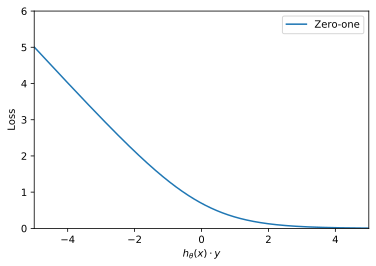

In [2]:
hy = np.linspace(-5,5,1000)
plt.plot(hy, np.log(1+np.exp(-hy)))
plt.xlim([-5,5])
plt.ylim([0, 6])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")
plt.legend(['Zero-one', 'Logistic', 'Hinge', 'Exponential'])

This function is small when $h_\theta(x)\cdot y$ is large (meaning we have the correct class prediction with high confidence), and increases linearly as $h_\theta(x)\cdot y$ becomes more negative (meaning we have the incorrect prediction, with increasing confidence).  And unlike, for example, the hinge loss, this loss was smooth and differentiable everywhere.

But this seems like a somewhat ad-hoc justification, and it turns out there is a way of understanding logistic regression from the perspective of maximum likelihood estimation instead.  The core idea here is we are going to use what is called a _log linear_ model, that is we are going to represent the probability
\begin{equation}
p(y=+1 \mid x;\theta_+) \propto \exp(\theta^T_+ x)
\end{equation}
where $\theta_+ \in \mathbb{R}^n$ denotes a set of parameters encoding the probability of positive class.  The rationale for this log-linear model, at some level is just the fact that, because it's common to take log probabilities as we've seen above, we want these log-probabilities to have a simple form, and a linear model is one such simple form (there are a few other ways of justifying it, but frankly I think this is the most honest justification, just like we justified least-squares loss by the fact that it was mathematically easy to solve for).  One important aspect to notice, though, is that here we are _directly_ modeling the conditional distribution $p(y  \mid x)$, rather than (as we did in naive Bayes), modeling the joint distribution $p(x,y)$ and then using Bayes' rule to convert this to a conditional distribution.  In case you encounter these terms elsewhere, this puts logistic regression in a class of models called _discriminative_ models, whereas naive Bayes is an instance of a _generative_ model (we will see generative models again when we talk about probabilistic modeling).

In order to turn the above into an actual probability, we need to also have a set of parameters for encoding the negative probability
\begin{equation}
p(y=-1 \mid x;\theta_-) \propto \exp(\theta^T_- x).
\end{equation}
with parameterized by the parameter $\theta_-$.  Then the actual probability of the positive class is given by
\begin{equation}
p(y=+1 \mid x ; \theta_+, \theta_i) = \frac{\exp(\theta^T_+ x)}{\exp(\theta^T_+ x) + \exp(\theta^T_- x)} = \frac{1}{1 + \exp((\theta_- - \theta_+)^T x)}.
\end{equation}
where we get the second equality by dividing both the numerator and denominator by $\exp(\theta^T_+ x)$.  Thus, it turns out, we don't actually need both the $\theta_+$ and $\theta_-$, but can just represent their _difference_ as the single parameter vector $\theta = \theta_+ - \theta_-$.  Given this, it should be apparent that
\begin{equation}
p(y \mid x;\theta) = \frac{1}{1 + \exp(-\theta^T x)}.
\end{equation}
Let's apply maximum likelihood estimation to estimate the parameters $\theta$.  This is done by solving the optimization problem
\begin{equation}
\maximize_\theta \; \sum_{i=1}^m \log p(y^{(i)} \mid x^{(i)};\theta) \; \equiv \; \minimize_\theta \;\sum_{i=1}^m \log(1+\exp(-\theta^T x))
\end{equation}
i.e., maximum likelihood estimation under a log-linear model for binary classification correspond exactly to minimizing logistic loss.  This interpretation, however, also gives us a method for computing probabilities of each class under our logistic regression model, which is often viewed as one of the primary advantages of the method.
